## **14. 특징 추출 및 변환**

### 이 노트북의 전체 흐름 및 실습 개요

이 노트북은 데이터 전처리와 특징 추출(Feature Extraction) 과정을 단계별로 실습하는 예제입니다. 주요 흐름은 다음과 같습니다.

1. **데이터 로딩 및 결측치 처리**  
   - 공기질 데이터셋을 불러오고, 일산화탄소(CO) 변수의 결측치를 선형 보간법으로 처리합니다.
2. **구간화(Binning)**  
   - CO 변수의 값을 여러 구간(bins)으로 나누고, 각 구간에 레이블을 붙여 범주형 변수로 변환합니다.
3. **로그 변환(Log Transformation)**  
   - 질소 산화물(NOx) 변수에 로그 변환을 적용하여 분포를 정규화합니다.
4. **원핫인코딩(One-hot Encoding)**  
   - 예제 데이터(직원 정보)에서 범주형 변수(gender, remarks)를 원핫인코딩으로 변환합니다.
5. **정규화(Normalization)**  
   - CO와 NMHC(비메탄탄화수소) 변수의 결측치를 처리하고, 최소-최대 정규화를 적용합니다.
6. **특징 분할(Feature Split)**  
   - 영화 정보 문자열 데이터를 제목, 연도, 감독으로 분할하여 데이터프레임으로 만듭니다.

각 단계마다 시각화와 예제 코드가 포함되어 있으며, 실제 데이터 분석 및 머신러닝 전처리 과정의 전형적인 흐름을 실습할 수 있습니다.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# 데이터 읽어오기

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\yun\AppData\Local\Temp\ipykernel_34236\1189875795.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(input_file,


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [7]:
# [+] 일산화탄소 변수 결측 데이터 처리
co = df['CO(GT)'].copy()  # 복사본 생성
co.interpolate(inplace=True) # 선형 보간

### **구간화**(binning)

In [10]:
# [+] 최대값, 최소값
max_val = co.max()
min_val = co.min()

print(max_val, min_val)

11.9 0.0


In [13]:
# [+] 구간 별 기준 값 집합 생성
bins = np.linspace(min_val, max_val, 6)  # 기준값이 6개라 구간이 5개가 됨
bins

array([ 0.  ,  2.38,  4.76,  7.14,  9.52, 11.9 ])

In [14]:
# 구간에 대한 레이블 집합,X축 레이블을 표기하기 위해
labels=['0 <=x<2.38', '2.38<=x<4.76', '4.76<=x<7.14',
       '7.14<=x<9.52', '9.52<=x<11.9']

In [16]:
# 일산화탄소 변수(수치형)에 대한 범주형 변수 생성, 구간화 하는 부분->판다스의cut()을 사용
df['bins'] = pd.cut(
    co, 
    bins=bins, 
    labels=labels, 
    include_lowest=True # 첫 번째 구간의 왼쪽 경계값을 포함할지 여부
)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CO(GT)         7765 non-null   float64 
 1   PT08.S1(CO)    8991 non-null   float64 
 2   PT08.S2(NMHC)  8991 non-null   float64 
 3   NOx(GT)        7718 non-null   float64 
 4   PT08.S3(NOx)   8991 non-null   float64 
 5   NO2(GT)        7715 non-null   float64 
 6   PT08.S4(NO2)   8991 non-null   float64 
 7   PT08.S5(O3)    8991 non-null   float64 
 8   RH             8991 non-null   float64 
 9   AH             8991 non-null   float64 
 10  C6H6(GT)       9357 non-null   float64 
 11  bins           9357 non-null   category
dtypes: category(1), float64(11)
memory usage: 886.6 KB


In [ ]:
# bins 변수 출력, 수치형>범주형으로 변환
df[['CO(GT)','bins']]

,CO(GT),bins
Datetime,,
2004-03-10 18:00:00,2.6,2.38<=x<4.76
2004-03-10 19:00:00,2.0,0 <=x<2.38
2004-03-10 20:00:00,2.2,0 <=x<2.38
2004-03-10 21:00:00,2.2,0 <=x<2.38
2004-03-10 22:00:00,1.6,0 <=x<2.38
...,...,...
2005-04-04 10:00:00,3.1,2.38<=x<4.76
2005-04-04 11:00:00,2.4,2.38<=x<4.76
2005-04-04 12:00:00,2.4,2.38<=x<4.76


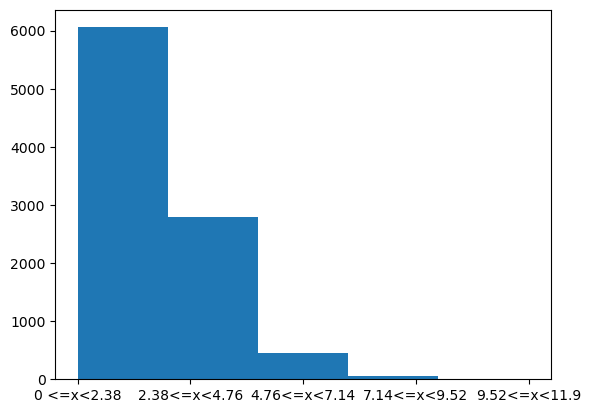

In [ ]:
# bins 변수의 히스토그램 시각화, 첫번쨰 구간에 해당하는 값이 많음(빈도)
plt.hist(sorted(df['bins']), bins=len(bins)-1)
plt.show()

### **로그 변환**(log transformation)

c:\Users\yun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


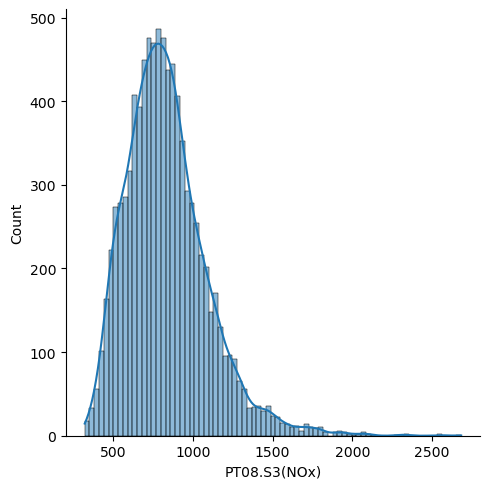

In [22]:
# 질소 산화물 분포 시각화
sns.displot(df['PT08.S3(NOx)'], kde=True)

In [24]:
# [+] 로그 스케일로 변환: Common logarithm(log10)
# 로그 스케일의 장점은 데이터의 분포를 더 잘 이해할 수 있게 해줌
# 로그 변환을 통해 데이터의 분포를 정규화하고, 이상치의 영향을 줄일 수 있음
df['log'] = np.log10(df['PT08.S3(NOx)'])

In [25]:
# 변환된 변수 출력
df['log']

Datetime
2004-03-10 18:00:00    3.023664
2004-03-10 19:00:00    3.069668
2004-03-10 20:00:00    3.056905
2004-03-10 21:00:00    3.038223
2004-03-10 22:00:00    3.080987
                         ...   
2005-04-04 10:00:00    2.731589
2005-04-04 11:00:00    2.781037
2005-04-04 12:00:00    2.780317
2005-04-04 13:00:00    2.846337
2005-04-04 14:00:00    2.815578
Name: log, Length: 9357, dtype: float64

c:\Users\yun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


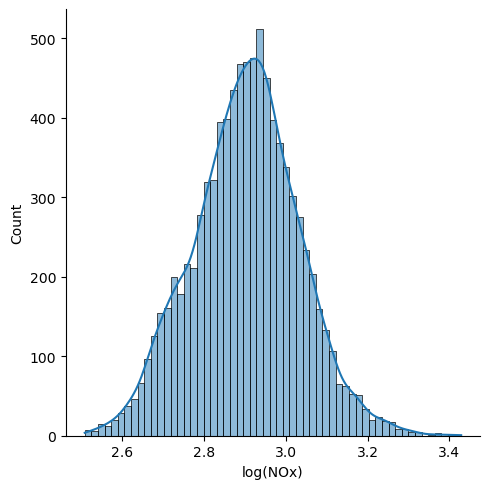

In [26]:
# 변환된 변수의 분포 시각화
sns.displot(df['log'], kde=True)
plt.xlabel('log(NOx)')
plt.show()

### **원핫인코딩**(one-hot encoding)
+ 범주 별로 인덱스를 할당하는 방식

+ 구간화의 반대라고 생각하면 좋음

In [27]:
# 예제 데이터: 인사 평가

emp_id = pd.Series([1, 2, 3, 4, 5])
gender = pd.Series(['Male', 'Female', 'Female', 'Male', 'Female'])
remarks = pd.Series(['Nice', 'Good', 'Great', 'Great', 'Nice'])

df_emp = pd.DataFrame()
df_emp['emp_id'] = emp_id
df_emp['gender'] = gender
df_emp['remarks'] = remarks

df_emp

,emp_id,gender,remarks
0,1,Male,Nice
1,2,Female,Good
2,3,Female,Great
3,4,Male,Great
4,5,Female,Nice


In [32]:
# [+] 범주형 변수 별(gender, remarks) Unique value 리스트 출력
print(df_emp['gender'].unique())
print(df_emp['remarks'].unique())

['Male' 'Female']
['Nice' 'Good' 'Great']


In [38]:
# [+] 원핫인코딩 적용: 범주형 변수 -> 이진값 벡터
df_emp_encoded = pd.get_dummies(
    df_emp,
    columns=['gender','remarks'],
    dtype=int,  # 이진값 벡터로 변환
)
df_emp_encoded

,emp_id,gender_Female,gender_Male,remarks_Good,remarks_Great,remarks_Nice
0,1,0,1,0,0,1
1,2,1,0,1,0,0
2,3,1,0,0,1,0
3,4,0,1,0,1,0
4,5,1,0,0,0,1


### **정규화**(normalization)

In [41]:
# [+] 비메탄탄화수소 변수 결측 데이터 처리
nmhc = df['PT08.S2(NMHC)'] # 복사본 생성
nmhc.interpolate(inplace=True)# 결측치 처리

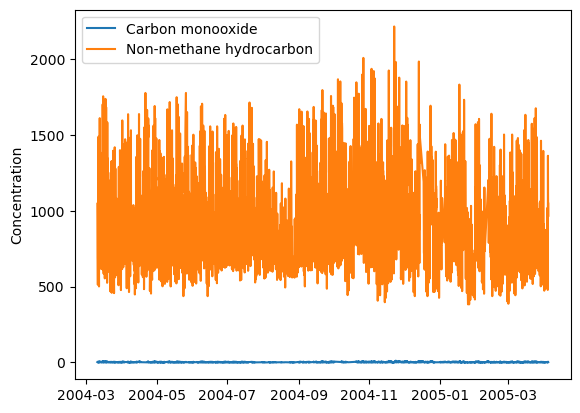

In [42]:
# 스케일이 서로 다른 두 변수 시각화
plt.plot(co, label='Carbon monooxide')
plt.plot(nmhc, label='Non-methane hydrocarbon')
plt.ylabel('Concentration')
plt.legend(loc='best')

In [45]:
# [+] 일산화탄소 변수 정규화
co_max = co.max()  # 최대값
co_min = co.min()  # 최소값

# 최소-최대 정규화
# 정규화는 (x - min) / (max - min) 공식을 사용
#변수 분포에는 변화가 없지만, 값의 범위가 0과 1 사이로 조정됨
df['CO_Norm'] = (co - co_min) / (co_max - co_min)
df['CO_Norm'] = df['CO_Norm'].round(2)  # 소수점 둘째 자리까지 반올림
df['CO_Norm']

Datetime
2004-03-10 18:00:00    0.22
2004-03-10 19:00:00    0.17
2004-03-10 20:00:00    0.18
2004-03-10 21:00:00    0.18
2004-03-10 22:00:00    0.13
                       ... 
2005-04-04 10:00:00    0.26
2005-04-04 11:00:00    0.20
2005-04-04 12:00:00    0.20
2005-04-04 13:00:00    0.18
2005-04-04 14:00:00    0.18
Name: CO_Norm, Length: 9357, dtype: float64

In [46]:
# [+] 비메탄탄화수소 변수 정규화
nmhc_max = nmhc.max()  # 최대값
nmhc_min = nmhc.min()

df['NMHC_Norm'] = (nmhc - nmhc_min) / (nmhc_max - nmhc_min)
df['NMHC_Norm']

Datetime
2004-03-10 18:00:00    0.362097
2004-03-10 19:00:00    0.312398
2004-03-10 20:00:00    0.303659
2004-03-10 21:00:00    0.308575
2004-03-10 22:00:00    0.247406
                         ...   
2005-04-04 10:00:00    0.392135
2005-04-04 11:00:00    0.351720
2005-04-04 12:00:00    0.371382
2005-04-04 13:00:00    0.315674
2005-04-04 14:00:00    0.362643
Name: NMHC_Norm, Length: 9357, dtype: float64

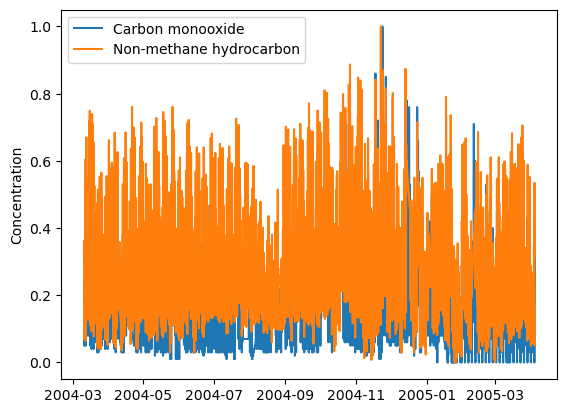

In [47]:
# 정규화된 두 변수 시각화
plt.plot(df['CO_Norm'], label='Carbon monooxide')
plt.plot(df['NMHC_Norm'], label='Non-methane hydrocarbon')
plt.ylabel('Concentration')
plt.legend(loc='best')

### **특징 분할**

In [49]:
# 예제: 영화 데이터
movies = pd.Series(["The Godfather, 1972, Francis Ford Coppola",
                    "Contact, 1997, Robert Zemeckis",
                   "Parasite, 2019, Joon-ho Bong"])

movies

0    The Godfather, 1972, Francis Ford Coppola
1               Contact, 1997, Robert Zemeckis
2                 Parasite, 2019, Joon-ho Bong
dtype: object

In [52]:
# 영화 데이터의 값 부
# Divide movie data into title, year, director columns
lst_title = []
lst_year = []
lst_director = []

for val in movies:
    title, year, director = val.split(',')  # data split
    lst_title.append(title)
    lst_year.append(year)
    lst_director.append(director)

print(lst_title)
print(lst_year)
print(lst_director)

['The Godfather', 'Contact', 'Parasite']
[' 1972', ' 1997', ' 2019']
[' Francis Ford Coppola', ' Robert Zemeckis', ' Joon-ho Bong']


In [53]:
# Make a DataFrame object
df_movie = pd.DataFrame()
df_movie['title'] = lst_title
df_movie['year'] = lst_year
df_movie['director'] = lst_director

df_movie

,title,year,director
0,The Godfather,1972,Francis Ford Coppola
1,Contact,1997,Robert Zemeckis
2,Parasite,2019,Joon-ho Bong
